In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

# Дерево решений для Регрессии

## На двух признаках

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

features = ['HouseAge', 'Population']

df = df[features+['target']].head()
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [6]:
X = df[features]
y = df['target']

## Обучение

**`Узел(Node)`**: Решающая вершина, Корневой узел(для самого первого)
Отображает вопрос что будет делить выборку.\
**Значение выбранного критерия** - Значение ошибки. \
**samples** - Количество объектов на этом этапе.\
**value** - Среднее значение таргетов на этом этапе


**`Лист(Leaf)`**: Терминальный лист, терминальная вершина. Является конечным прогнозом 

---------
Дерево решений задает серию бинарных **вопросов**, деля на выборку на каждом этапе на 2 подвыборки(True/False) пытаясь минимизировать критериальную ошибку. Ветвление продолжается до тех пор пока не будет достигнут **критерий останова** или дерево не выродится в листы, содержащих только по одному элементу.

**Вопросы**\
Как правило вопросом выступает ***Меньше или равно( <= )**\
В качестве вопроса могут выступать либо все уникальные значения выборки, кроме максимального(Потому что он не делит выборку на две части), либо среднее соседних уникальных отсортированных элементов.\
После определения всех уникальных разбиений вопросами выбирается тот, что имеет наибольший **Прирост информации**

**Прирост информации**
Рассчитывается как разность между ошибкой в узле и суммой нормированных ошибок в разбиении:
$$
IG = MSE_{root} - (\frac{n_{left}}{n_{node}}MSE_{left} + \frac{n_{right}}{n_{node}}MSE_{right})
$$


**Предсказание**\
Полученный образец отправляется по построенным веткам и дойдя до конца ему назначается лист со значением - это и будет предсказание

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [8]:
tree = DecisionTreeRegressor(random_state=1)
tree

DecisionTreeRegressor(random_state=1)

In [9]:
tree.fit(X, y)

DecisionTreeRegressor(random_state=1)

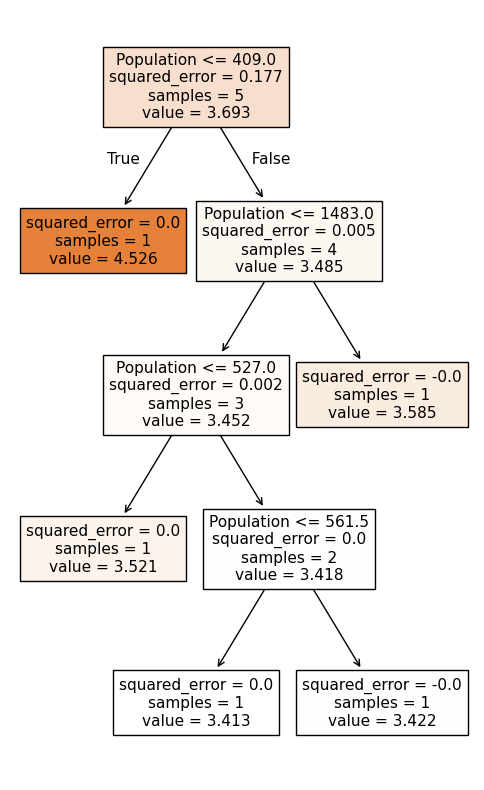

In [10]:
plt.figure(figsize=(6, 10))
plot_tree(tree, feature_names=features, filled=True);

**1 этап**

In [11]:
value = np.mean(y)
squarred_error = np.mean((y-value)**2)

print(f'value: {value}')
print(f'squarred_error: {squarred_error}')

value: 3.6934000000000005
squarred_error: 0.17739543999999993


## Критерии останова

**`max_depth`** - Глубина дерева. Максимальное количество уровней с вопросами. Чем глубже дерево тем оно сложнее. \
В случаии переобучения - **уменьшить**

**`min_samples_leaf`** - Минимальное количество объектов в одном листе. В ситуации с высокой сложностью дерева, оно может выродиться в листы с одним элементом в выборке.  \
В случаии переобучения - **увеличить**(Остановить ветвлении при достижении порогового количества значений в сэмпле листа)

**`max_leaf_nodes`** - Максимальное количество листьев. При большом количестве листьев, есть вероятность возникновения той же проблемы, что дерево выродилось в листья с одним элементом в сэмпле.\
В случаии переобучения - **уменьшить*

# Дерево решений для Классификации

Задает серию бинарных вопросов, аналогично Регрессору, но вкачестве **критерия ошибки** выступают другие метрики.\
Пытается минимизировать (**критерий gini** / **Энтропию**)

**Вопросы**\
Вопросы, разбивающие данные на выборки задаются аналогично Регрессору. 
После определения всех уникальных разбиений вопросами выбирается тот, что имеет наибольший **Прирост информации(функционал качества)**

**Прирост информации(Функционал качества)**\
Рассчитывается как разность между значением критерия ошибки в узле умноженном на количество элементов в узле и критерием ошибки в подвыборках, умноженных на количество элементов в подвыборки и нормированных на отношение количества.
$$
Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r})
$$

$Q$ - Функционал качества(После всех уникальных разбиений вопросами, выбирается тот вопрос, после которого Q наибольший)\
$H$ - Выбранный **критерий информативности**(Задача состоит в его минимизации)\
$X$ - Количество элементов в выборке

**Критерии информативности:**\
**Энтропия Шеннона**\
Сумма вероятностей быть каждым классом, умноженная на логарифм по основанию двойки этой вероятности.\
Предполагается что логарифм по основанию 2 от нуля = нулю.
$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$
**Критерий gini**\
Или индекс-Джини. \
Рассчитывается как разность между единицей и суммой квадратов вероятностей быть каждым классом
$$H(X) = 1 - \sum_{k=1}^K{p_k^2}$$
Или как сумма вероятностей быть каждым классом умноженных на единицу минус этой веротности
$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k})$$

**Предсказание**\
Полученный образец отправляется по построенным веткам и дойдя до конца ему назначается лист со значением - это и будет предсказание


## На двух признаках

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.datasets import make_classification

In [15]:
df = pd.read_csv('data/cardio.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
features = ['age', 'ap_hi']
target = ['cardio']

In [17]:
df['age'] = (round(df['age'])/365)
df = df[features+target]
df = df.head()

In [18]:
df

,age,ap_hi,cardio
0,50.391781,110,0
1,55.419178,140,1
2,51.663014,130,1
3,48.282192,150,1
4,47.873973,100,0


In [19]:
X = df[features]
y = df[target]

## Обучение

### gini

In [23]:
tree = DecisionTreeClassifier(random_state=1)
tree

DecisionTreeClassifier(random_state=1)

In [24]:
tree.fit(X, y)

DecisionTreeClassifier(random_state=1)

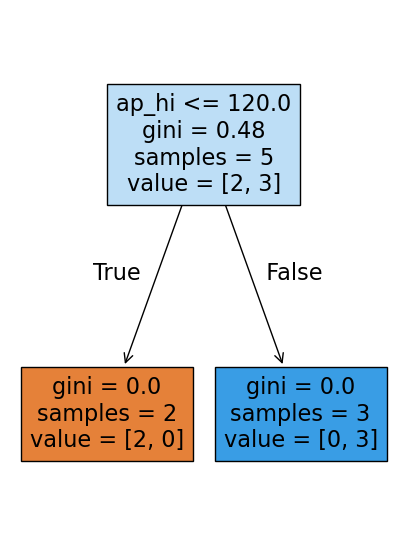

In [27]:
plt.figure(figsize=(5, 7))
plot_tree(tree, feature_names=features, filled=True);

**Критерий gini на первом этапе**

In [48]:
# Единица - (квадрат вероятности быть первым классом + квадрат вероятности быть вторым классом)
1-((2/5)**2 +(3/5)**2)

0.48

In [51]:
# Вероятность быть первым классом*единица минус вероятность + Вероятность быть вторым классом*единица минус вероятность
(2/5)*(1-(2/5)) + (3/5)*(1-(3/5))

0.48

### Энтропия

In [29]:
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
tree_entropy

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [30]:
tree_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

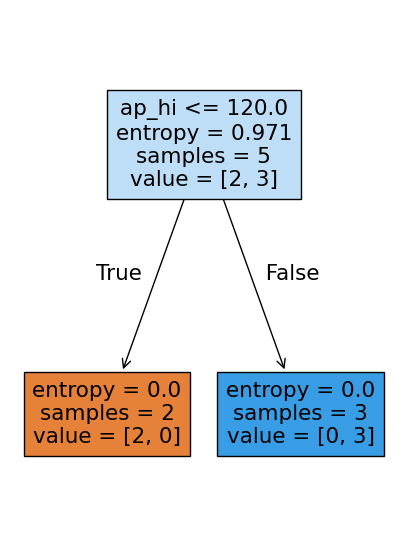

In [32]:
plt.figure(figsize=(5, 7))
plot_tree(tree_entropy, feature_names=features, filled=True);

**Энтропия на первом этапе**

In [49]:
# Минус (Вероятность быть первым классом * логарифм по основанию 2 от этой вероятности + 
# Вероятность быть вторым классом * логарифм по основанию 2 от этой вероятности)
from math import log
-(log((2/5), 2)*(2/5) + log((3/5), 2)*(3/5))

0.9709505944546686